## DT Classifier using PIMA Indian Diabetes Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
cols = ['Preg','Glucose','BP','SkinThickness','Insulin','BMI','Pedigree','Age','Target']
df.columns = cols

In [6]:
df.head()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
df.describe()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the statistics, we can observethat Glucode, BP, SkinThickness, Insulin and BMI can't be zero.  Also, there are outliers in Insulin.

In [8]:
miss_col = df.iloc[:,1:6].columns.tolist()
miss_col

['Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
for col in miss_col:
    df[col] = df[col].replace({0:np.nan})

In [10]:
## Missing Values
miss_values = df.isnull().sum()
miss_values[miss_values > 0]

Glucose            5
BP                35
SkinThickness    227
Insulin          373
BMI               11
dtype: int64

In [11]:
df.describe()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
count,767.000000,762.000000,732.000000,540.000000,394.000000,756.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.540786,12.390616,10.483667,118.775855,6.929448,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,36.000000,190.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After identifying the missing values, still we can find many discripancies in the data.  Mainly, the Glucose, BP and Insulin columns have below normal than the standard values.  Let us keep the standard values as minimum and keep the below minimum values as missing values.

In [12]:
df_copy = df.copy(deep=True)

In [13]:
df.loc[df.Glucose < 60, 'Glucose'] = np.nan
df.loc[df.BP < 70, 'BP'] = np.nan
df.loc[df.Insulin < 70, 'Insulin'] = np.nan

In [14]:
## Missing Values
miss_values = df.isnull().sum()
miss_values[miss_values > 0]

Glucose            9
BP               318
SkinThickness    227
Insulin          452
BMI               11
dtype: int64

In [15]:
df.describe()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
count,767.000000,758.000000,449.000000,540.000000,315.000000,756.000000,767.000000,767.000000,767.000000
mean,3.842243,122.011873,79.908686,29.142593,182.368254,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.213177,8.598076,10.483667,118.358589,6.929448,0.331497,11.752296,0.476682
min,0.000000,61.000000,70.000000,7.000000,70.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,74.000000,22.000000,105.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,78.000000,29.000000,146.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,84.000000,36.000000,210.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
gl_miss_idx = df.loc[df.Glucose.isnull()].index.tolist()
gl_miss_idx

[61, 74, 145, 181, 341, 348, 501, 536, 679]

### Imputing missing values using Iterative Imputer


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [18]:
imp = IterativeImputer(verbose=1)

In [19]:
imp.fit(df)

[IterativeImputer] Completing matrix with shape (767, 9)
[IterativeImputer] Change: 175.6773829426746, scaled tolerance: 0.846 
[IterativeImputer] Change: 20.884986565377854, scaled tolerance: 0.846 
[IterativeImputer] Change: 15.225149413512089, scaled tolerance: 0.846 
[IterativeImputer] Change: 11.976045153818696, scaled tolerance: 0.846 
[IterativeImputer] Change: 9.821781191202785, scaled tolerance: 0.846 
[IterativeImputer] Change: 8.215393142739856, scaled tolerance: 0.846 
[IterativeImputer] Change: 6.912941309573132, scaled tolerance: 0.846 
[IterativeImputer] Change: 5.811142595179522, scaled tolerance: 0.846 
[IterativeImputer] Change: 4.858081977828704, scaled tolerance: 0.846 
[IterativeImputer] Change: 4.0198745566647, scaled tolerance: 0.846 


IterativeImputer(verbose=1)

In [20]:
df_imp = imp.transform(df)

[IterativeImputer] Completing matrix with shape (767, 9)


In [21]:
df_imp = pd.DataFrame(df_imp, columns = df.columns)
df_imp.head()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
0,1.0,85.0,75.955266,29.000000,88.669749,26.6,0.351,31.0,0.0
1,8.0,183.0,78.008871,21.309631,269.962359,23.3,0.672,32.0,1.0
2,1.0,89.0,76.695255,23.000000,94.000000,28.1,0.167,21.0,0.0
3,0.0,137.0,81.894755,35.000000,168.000000,43.1,2.288,33.0,1.0
4,5.0,116.0,74.000000,22.718179,135.766856,25.6,0.201,30.0,0.0


In [22]:
df_imp.loc[gl_miss_idx]

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
61,5.0,110.890745,77.575001,21.836664,134.836816,25.0,0.587,36.0,0.0
74,1.0,105.165502,76.316672,20.000000,119.749898,24.7,0.140,22.0,0.0
145,9.0,116.295986,80.000000,37.000000,159.879584,32.8,0.096,41.0,0.0
181,1.0,104.130814,74.000000,20.000000,113.599755,27.7,0.299,21.0,0.0
341,1.0,109.840460,76.581941,35.000000,141.223934,32.0,0.389,22.0,0.0
348,5.0,141.583928,80.000000,32.000000,212.130679,41.0,0.346,37.0,1.0
501,6.0,146.002762,81.010098,41.000000,227.619145,39.0,0.727,41.0,1.0
536,0.0,128.775591,80.544031,21.437501,188.864887,21.7,0.735,67.0,0.0
679,2.0,106.523710,74.577049,28.000000,122.053246,24.2,0.332,22.0,0.0


In [23]:
## Missing Values
miss_values = df_imp.isnull().sum()
miss_values[miss_values > 0]

Series([], dtype: int64)

In [24]:
df_imp.describe()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.974198,79.305218,28.852677,167.555758,32.439462,0.471674,33.219035,0.348110
std,3.370877,30.081875,6.833410,9.602276,92.146084,6.885310,0.331497,11.752296,0.476682
min,0.000000,61.000000,70.000000,7.000000,35.825217,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,75.905479,22.125998,105.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,78.000000,28.263380,145.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,81.789890,35.000000,203.988078,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outlier Treatment

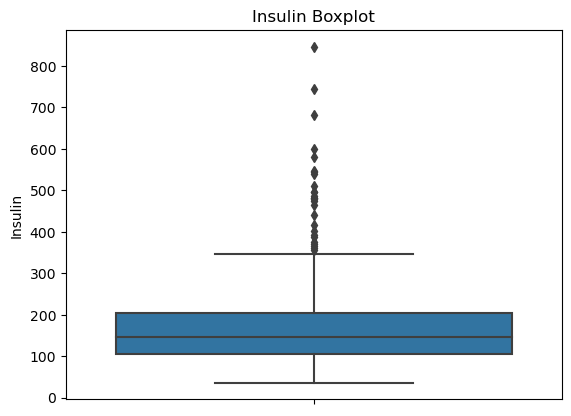

In [25]:
sns.boxplot(y='Insulin', data = df_imp, hue = 'Target')
plt.title('Insulin Boxplot')
plt.show()

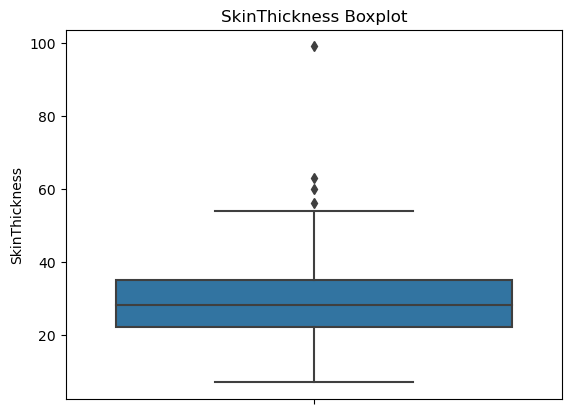

In [26]:
sns.boxplot(y='SkinThickness', data = df_imp, hue = 'Target')
plt.title('SkinThickness Boxplot')
plt.show()

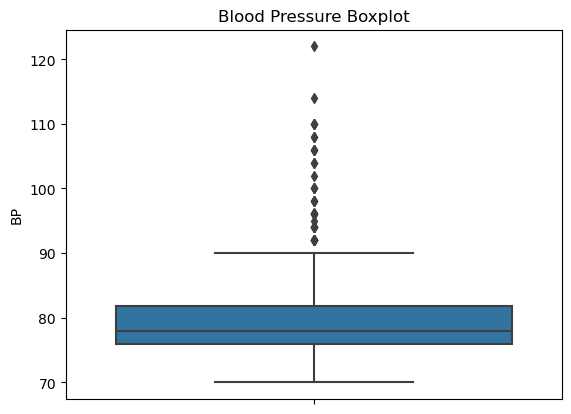

In [27]:
sns.boxplot(y='BP', data = df_imp, hue = 'Target')
plt.title('Blood Pressure Boxplot')
plt.show()

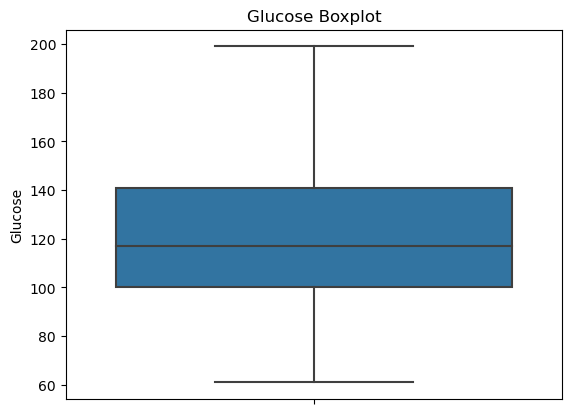

In [28]:
sns.boxplot(y='Glucose', data = df_imp, hue = 'Target')
plt.title('Glucose Boxplot')
plt.show()

### Treating Insulin Colulmn

In [29]:
ins_75, ins_25 = df_imp['Insulin'].quantile([.75,.25])
ins_iqr= ins_75 - ins_25

In [30]:
ins_75, ins_25, ins_iqr

(203.98807788988, 105.0, 98.98807788988)

In [31]:
## Upper limit for identifying outliers
ins_ul = ins_75 + 1.5 * ins_iqr
ins_ul

352.47019472470004

In [32]:
## Getting the index of outliers
ins_ol_idx = df_imp[df_imp.Insulin > ins_ul].index.tolist()
len(ins_ol_idx)

27

In [33]:
## Checking all of them are belong to same class or different classes
df_imp.loc[ins_ol_idx, 'Target'].value_counts()

1.0    16
0.0    11
Name: Target, dtype: int64

In [34]:
## Getting the non-outlier indices
good_idx = [idx for idx in df_imp.index if idx not in ins_ol_idx]

In [35]:
## Checking whether is there any difference in insulin levels for target class.
df_imp.loc[good_idx].groupby('Target')['Insulin'].max()

Target
0.0    342.000000
1.0    344.919433
Name: Insulin, dtype: float64

In [36]:
## Getting the value to treat the outliers
max_ins_value = df_imp.loc[good_idx].groupby('Target')['Insulin'].max().max()
max_ins_value

344.9194333228735

In [37]:
## Treating the outliers
df_imp.loc[ins_ol_idx, 'Insulin'] = max_ins_value

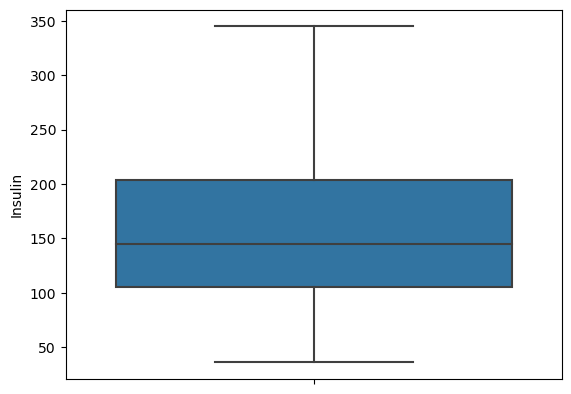

In [38]:
## Verifying with visualization
sns.boxplot(y = 'Insulin', data=df_imp)
plt.show()

In [39]:
def outlier_treatment(df, var):
    ##  IQR and Upper Limit
    
    per_75, per_25 = df[var].quantile([.75, .25])
    iqr = per_75 - per_25
    
    upper_limit = per_75 + iqr * 1.5
    
    ## Outliers' Index
    out_idx = df[df[var] > upper_limit].index.tolist()
    
    ## Non_outliers Index
    non_out_idx = [idx for idx in df.index if idx not in out_idx]
        
    ## column Max value for the given column from non-outliers
    col_class_max_value = df.loc[non_out_idx].groupby('Target')[var].max()
    
    ## Treating Outliers 
    df.loc[out_idx, var] = df.loc[out_idx, 'Target'].apply(lambda x: col_class_max_value[x])

    return df;
    

In [40]:
df_imp = outlier_treatment(df_imp, 'BP')

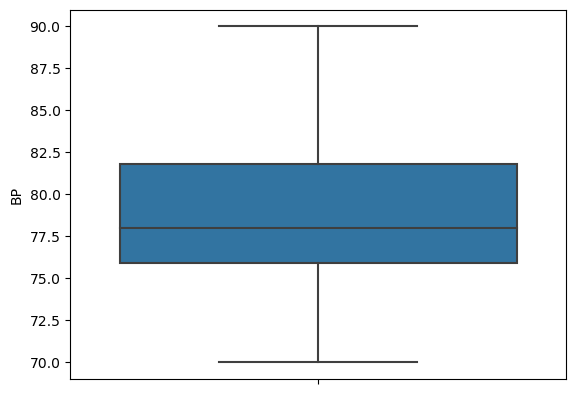

In [42]:
sns.boxplot(y = 'BP', data=df_imp)
plt.show()

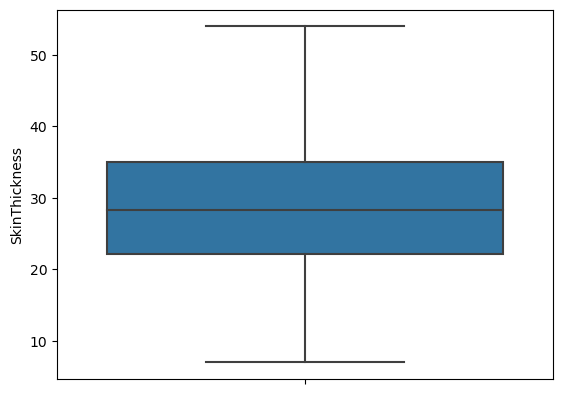

In [43]:
df_imp = outlier_treatment(df_imp, 'SkinThickness')
sns.boxplot(y = 'SkinThickness', data=df_imp)
plt.show()

In [44]:
df_imp.head()

,Preg,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Target
0,1.0,85.0,75.955266,29.000000,88.669749,26.6,0.351,31.0,0.0
1,8.0,183.0,78.008871,21.309631,269.962359,23.3,0.672,32.0,1.0
2,1.0,89.0,76.695255,23.000000,94.000000,28.1,0.167,21.0,0.0
3,0.0,137.0,81.894755,35.000000,168.000000,43.1,2.288,33.0,1.0
4,5.0,116.0,74.000000,22.718179,135.766856,25.6,0.201,30.0,0.0


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
X = df_imp.iloc[:,:-1]
y = df_imp.iloc[:,-1]

In [47]:
X.shape, y.shape

((767, 8), (767,))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [59]:
dt = DecisionTreeClassifier(min_samples_split=25)

In [60]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [61]:
dt_train_pred = dt.predict(X_train)
print("Train Accuracy : ",round(accuracy_score(y_train, dt_train_pred)*100,2),'%')

Train Accuracy :  86.79 %


In [62]:
print("Test Accuracy : ",round(accuracy_score(y_test, dt_pred)*100,2),'%')

Test Accuracy :  72.73 %


   ### Random Forest Model

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(min_samples_split=25,verbose=1)

In [73]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(min_samples_split=25, verbose=1)

In [74]:
rf_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [75]:
round(accuracy_score(y_test, rf_pred)*100,2)

77.92

In [76]:
round(accuracy_score(y_train, rf.predict(X_train))*100,2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


88.25